In [98]:
# Importa bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [99]:
# Usa pandas para ler o csv
df = pd.read_csv(
    r"C:\Users\augus\Documents\VsCode\fatec\Nova pasta\Lab4K-means\Mall_Customers.csv", index_col='CustomerID'
)
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [100]:
# Como o modelo só aceita valores numericos precisamos trocar as strings
df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1})
df.head()


C:\Users\augus\AppData\Local\Temp\ipykernel_13864\2356380945.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1})


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [101]:
# Aqui estamos usando StanderScaler para converter os numeros para os pesos ficarem mais semelhantes entre as colunas
scaler = StandardScaler()

df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,-1.128152,-1.424569,-1.738999,-0.434801
2,-1.128152,-1.281035,-1.738999,1.195704
3,0.886405,-1.352802,-1.700830,-1.715913
4,0.886405,-1.137502,-1.700830,1.040418
5,0.886405,-0.563369,-1.662660,-0.395980


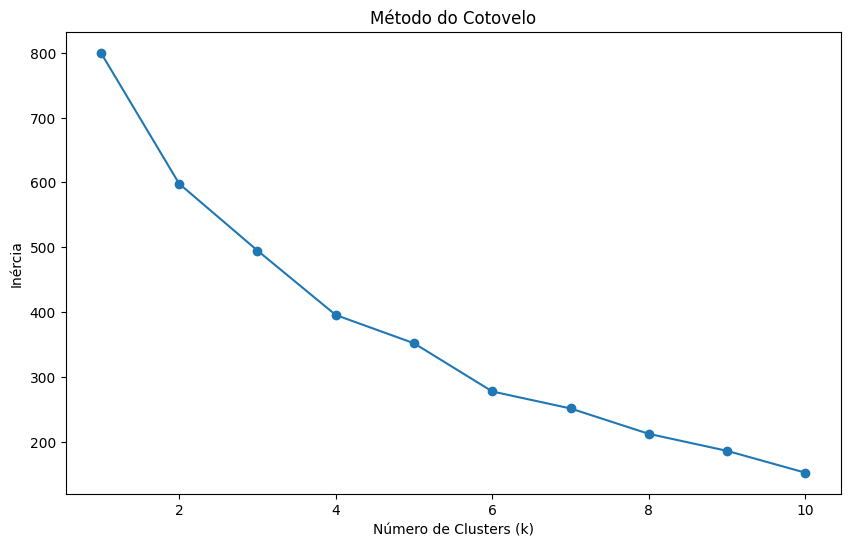

In [102]:
# Para descobrir a quantidade de clusters usei "elbow method" (traduzido pra Método do cotovelo) o metodo tem esse nome
# pois o numero de clusters a ser usado costuma ser onde se faz a curva no meu caso 3 a 4 clusters 

# Método do cotovelo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotar a inércia em relação ao número de clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [103]:
# define numero de cluster e treina o modelo
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)

# Adicionar previsões de clusters aos dados
df['Clusters'] = kmeans.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,-1.128152,-1.424569,-1.738999,-0.434801,2
2,-1.128152,-1.281035,-1.738999,1.195704,2
3,0.886405,-1.352802,-1.700830,-1.715913,4
4,0.886405,-1.137502,-1.700830,1.040418,4
5,0.886405,-0.563369,-1.662660,-0.395980,4


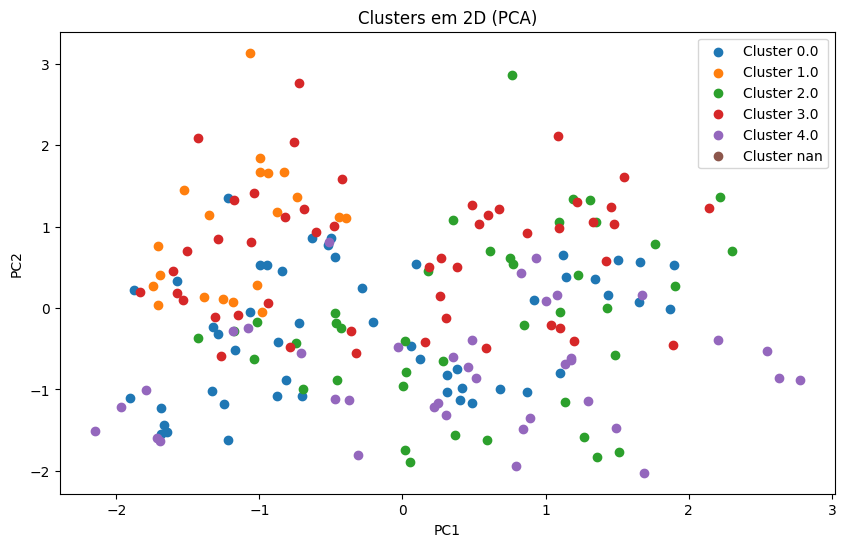

In [104]:
# Aplicar PCA para reduzir as dimensões para 2 componentes principais
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Criar um DataFrame com os componentes principais
pca_df_2d = pd.DataFrame(data=principal_components_2d, columns=['PC1', 'PC2'])
pca_df_2d['Clusters'] = df['Clusters']

# Plotar os clusters em 2D
plt.figure(figsize=(10, 6))
for cluster in np.unique(pca_df_2d['Clusters']):
    plt.scatter(
        pca_df_2d[pca_df_2d['Clusters'] == cluster]['PC1'],
        pca_df_2d[pca_df_2d['Clusters'] == cluster]['PC2'], 
        label=f'Cluster {cluster}'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters em 2D (PCA)')
plt.legend()
plt.show()

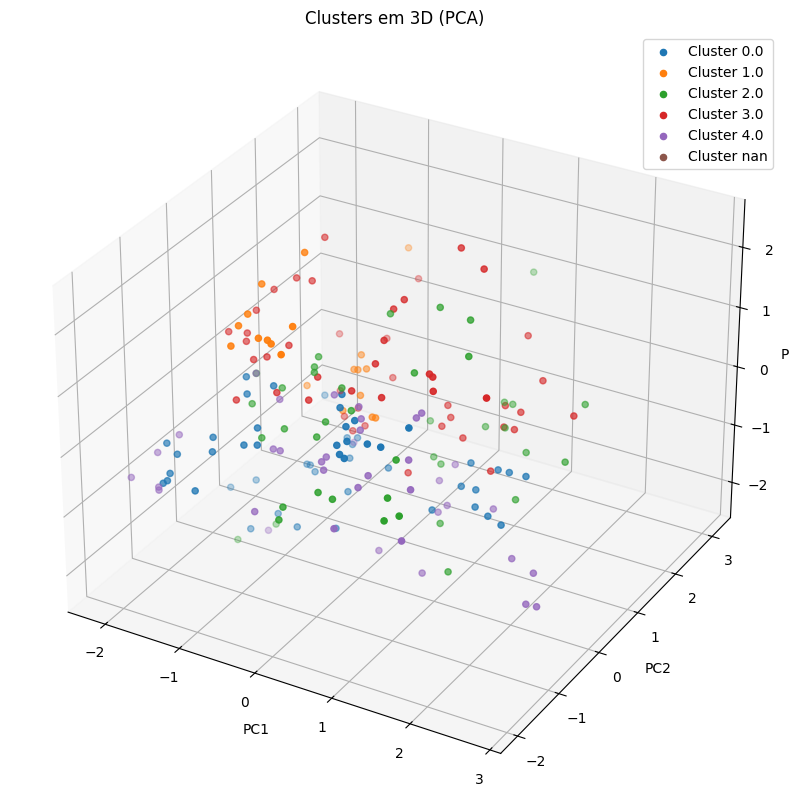

In [105]:
# Aplicar PCA para reduzir as dimensões para 3 componentes principais
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Criar um DataFrame com os componentes principais
pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Clusters'] = df['Clusters']

# Plotar os clusters em 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in np.unique(pca_df_3d['Clusters']):
    ax.scatter(
        pca_df_3d[pca_df_3d['Clusters'] == cluster]['PC1'],
        pca_df_3d[pca_df_3d['Clusters'] == cluster]['PC2'],
        pca_df_3d[pca_df_3d['Clusters'] == cluster]['PC3'],
        label=f'Cluster {cluster}'
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters em 3D (PCA)')
ax.legend()
plt.show()
